In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
df=pd.read_csv('data set/china_water_pollution_data (Logistic).csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'data set/china_water_pollution_data (Logistic).csv'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province                  3000 non-null   object 
 1   City                      3000 non-null   object 
 2   Monitoring_Station        3000 non-null   object 
 3   Latitude                  3000 non-null   float64
 4   Longitude                 3000 non-null   float64
 5   Date                      3000 non-null   object 
 6   Water_Temperature_C       3000 non-null   float64
 7   pH                        3000 non-null   float64
 8   Dissolved_Oxygen_mg_L     3000 non-null   float64
 9   Conductivity_uS_cm        3000 non-null   float64
 10  Turbidity_NTU             3000 non-null   float64
 11  Nitrate_mg_L              3000 non-null   float64
 12  Nitrite_mg_L              3000 non-null   float64
 13  Ammonia_N_mg_L            3000 non-null   float64
 14  Total_Ph

In [4]:
df.isnull().sum()

Province                      0
City                          0
Monitoring_Station            0
Latitude                      0
Longitude                     0
Date                          0
Water_Temperature_C           0
pH                            0
Dissolved_Oxygen_mg_L         0
Conductivity_uS_cm            0
Turbidity_NTU                 0
Nitrate_mg_L                  0
Nitrite_mg_L                  0
Ammonia_N_mg_L                0
Total_Phosphorus_mg_L         0
Total_Nitrogen_mg_L           0
COD_mg_L                      0
BOD_mg_L                      0
Heavy_Metals_Pb_ug_L          0
Heavy_Metals_Cd_ug_L          0
Heavy_Metals_Hg_ug_L          0
Coliform_Count_CFU_100mL      0
Water_Quality_Index           0
Pollution_Level               0
Remarks                     752
dtype: int64

In [5]:
le=LabelEncoder()
df['Province']=le.fit_transform(df['Province'])
df['City']=le.fit_transform(df['City'])
df['Monitoring_Station']=le.fit_transform(df['Monitoring_Station'])
df['Date']=le.fit_transform(df['Date'])
df['Pollution_Level']=le.fit_transform(df['Pollution_Level'])
df['Remarks']=le.fit_transform(df['Remarks'])

In [6]:
df['Remarks']=df['Remarks'].fillna(df['Remarks'].mode()[0])

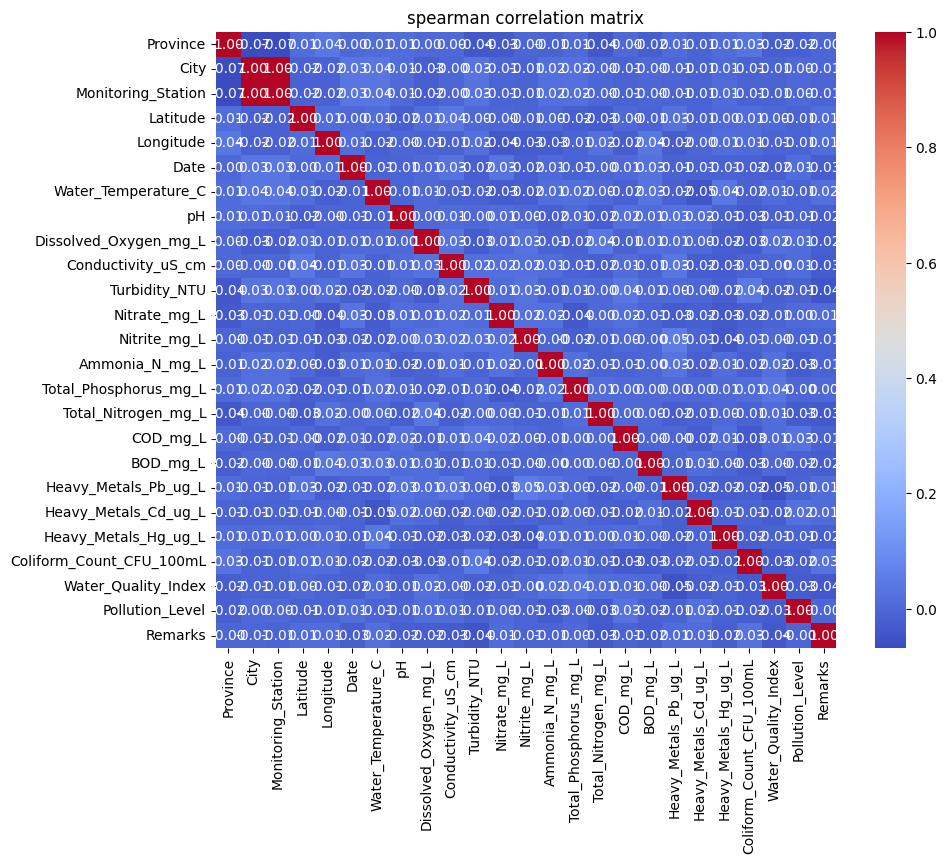

In [8]:
import seaborn as sns
plt.figure(figsize=(10,8))
spearman_corr=df.corr(method='spearman')
sns.heatmap(spearman_corr, annot=True,fmt=".2f",cmap='coolwarm',cbar=True)
plt.title('spearman correlation matrix')
plt.show()

In [9]:
df.corr()

,Province,City,Monitoring_Station,Latitude,Longitude,Date,Water_Temperature_C,pH,Dissolved_Oxygen_mg_L,Conductivity_uS_cm,...,Total_Nitrogen_mg_L,COD_mg_L,BOD_mg_L,Heavy_Metals_Pb_ug_L,Heavy_Metals_Cd_ug_L,Heavy_Metals_Hg_ug_L,Coliform_Count_CFU_100mL,Water_Quality_Index,Pollution_Level,Remarks
Province,1.000000,-0.058621,-0.058504,0.011217,0.036716,0.002567,0.011833,0.010730,0.000753,0.006716,...,-0.046930,0.001083,-0.021135,0.004973,-0.011443,0.008776,0.028586,-0.022417,-0.020816,-0.002260
City,-0.058621,1.000000,0.998571,-0.014663,-0.014814,0.033284,0.028552,0.007252,-0.011815,-0.007422,...,-0.001083,-0.006465,-0.002937,-0.007449,-0.007999,0.008167,-0.006661,-0.010632,0.003580,-0.004372
Monitoring_Station,-0.058504,0.998571,1.000000,-0.015356,-0.015100,0.032396,0.028048,0.005903,-0.009932,-0.008535,...,-0.000371,-0.005834,-0.004280,-0.009072,-0.008251,0.007944,-0.007184,-0.011734,0.002854,-0.005385
Latitude,0.011217,-0.014663,-0.015356,1.000000,0.008098,0.002443,0.003138,-0.014318,0.017354,0.044282,...,-0.025149,0.002321,-0.007571,0.025122,-0.016728,0.001570,0.009893,0.000199,-0.010740,0.013120
Longitude,0.036716,-0.014814,-0.015100,0.008098,1.000000,0.008105,-0.011626,-0.004627,-0.015465,-0.009865,...,0.021338,-0.026870,0.034311,-0.022773,0.006531,0.005947,0.007649,-0.008407,-0.006052,0.013400
Date,0.002567,0.033284,0.032396,0.002443,0.008105,1.000000,-0.014805,-0.006671,0.010804,0.030854,...,-0.002863,-0.001051,0.018679,-0.020901,-0.000219,-0.017241,-0.013688,-0.021195,0.011734,-0.025674
Water_Temperature_C,0.011833,0.028552,0.028048,0.003138,-0.011626,-0.014805,1.000000,-0.006433,0.004885,-0.008480,...,-0.000005,-0.013760,0.036570,-0.021017,-0.047077,0.029010,-0.025661,0.012051,-0.004022,0.025061
pH,0.010730,0.007252,0.005903,-0.014318,-0.004627,-0.006671,-0.006433,1.000000,-0.003483,0.004164,...,-0.026160,0.020986,0.001806,0.021984,0.017714,-0.010857,-0.030304,-0.013472,-0.005795,-0.011843
Dissolved_Oxygen_mg_L,0.000753,-0.011815,-0.009932,0.017354,-0.015465,0.010804,0.004885,-0.003483,1.000000,0.026660,...,0.035717,-0.002696,0.016559,0.014471,0.001617,-0.027234,-0.027732,0.018523,0.008819,-0.023228
Conductivity_uS_cm,0.006716,-0.007422,-0.008535,0.044282,-0.009865,0.030854,-0.008480,0.004164,0.026660,1.000000,...,-0.021447,0.016518,-0.006869,0.026554,-0.029845,-0.020264,-0.019560,-0.003677,0.006215,-0.027787


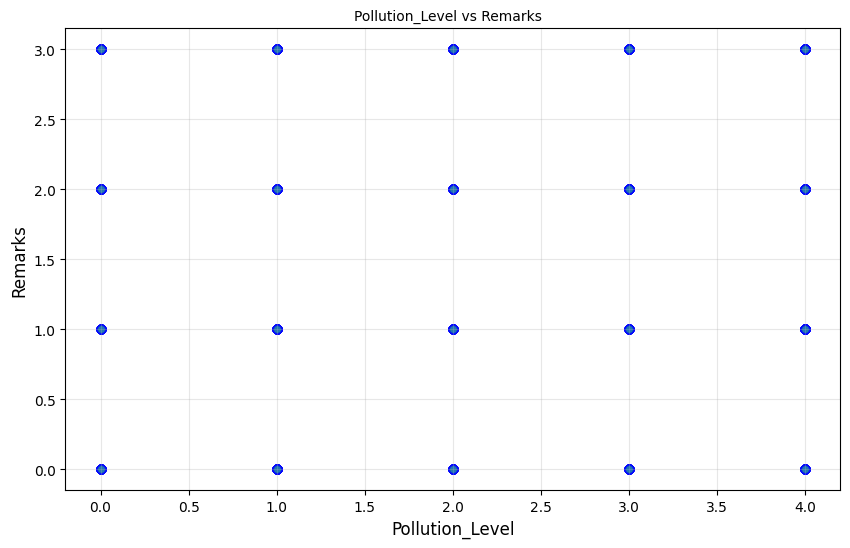

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df['Pollution_Level'],df['Remarks'],alpha=0.5,edgecolors='b')
plt.title("Pollution_Level vs Remarks  ",fontsize=10)
plt.xlabel("Pollution_Level",fontsize=12)
plt.ylabel("Remarks",fontsize=12)
plt.grid(alpha=0.3)
plt.show()

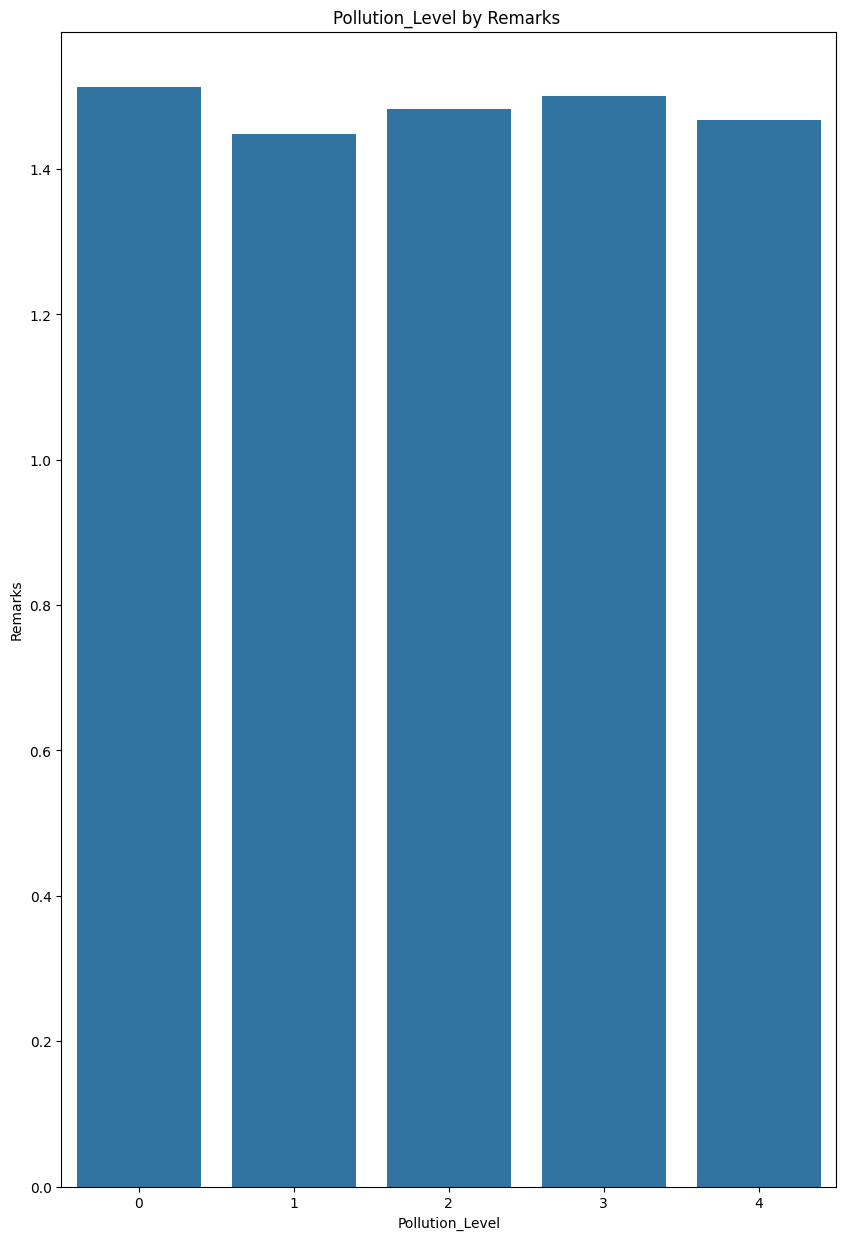

In [11]:
plt.figure(figsize=(10,15))
sns.barplot(x='Pollution_Level', y='Remarks',data=df,errorbar=None)
plt.title("Pollution_Level by Remarks ")
plt.xlabel("Pollution_Level")
plt.ylabel("Remarks")
plt.show()

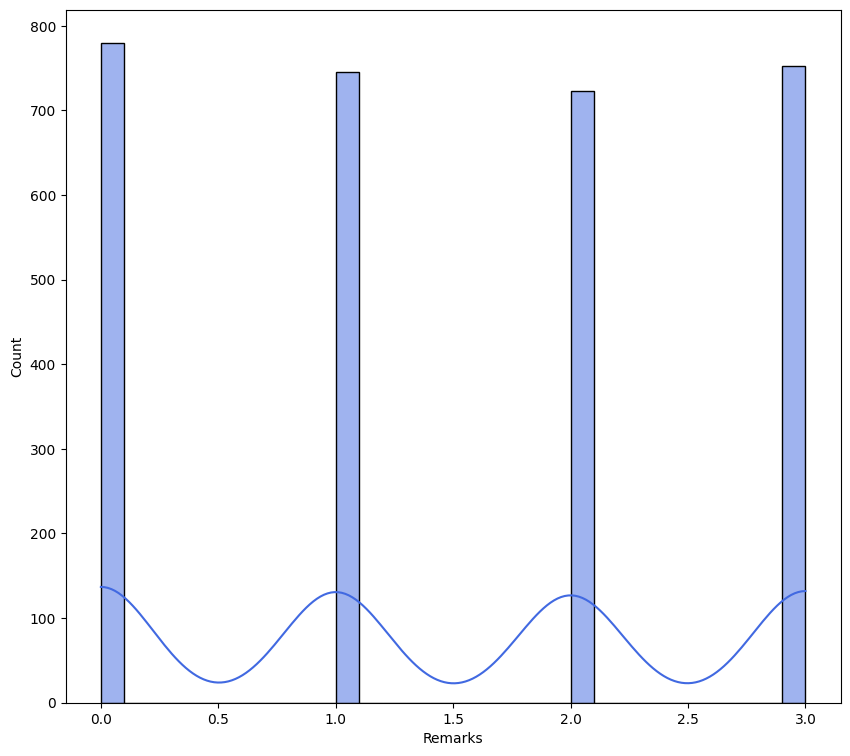

In [12]:
plt.figure(figsize=(10,9))
sns.histplot(df['Remarks'].dropna(),bins=30,kde=True,color='royalblue')
plt.show()

In [13]:
df=df.drop(['Date'],axis=1)

In [14]:
df['Remarks'].value_counts()

Remarks
0    780
3    752
1    745
2    723
Name: count, dtype: int64

In [15]:
from imblearn.over_sampling import SMOTE
x=df.drop(columns="Remarks",axis=1)
y=df["Remarks"]
smote=SMOTE(sampling_strategy="minority")
x_sm,y_sm=smote.fit_resample(x,y)
print(x_sm.shape)
print(y_sm.shape)

(3057, 23)
(3057,)


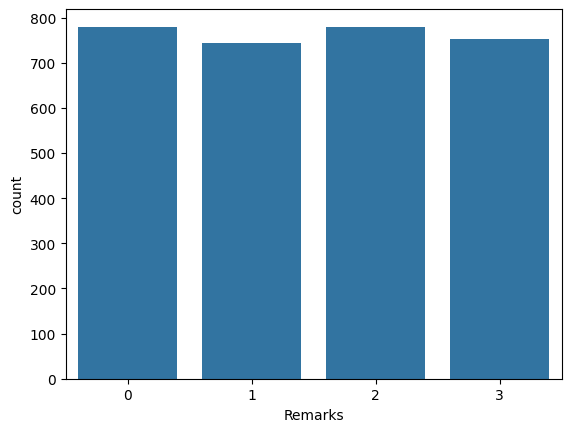

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=y_sm)
plt.show()

In [17]:
x=df.drop('Remarks',axis=1)
y=df['Remarks']
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x=ms.fit_transform(x)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=42)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.2688888888888889
              precision    recall  f1-score   support

           0       0.28      0.36      0.31       232
           1       0.30      0.19      0.23       237
           2       0.27      0.22      0.24       213
           3       0.24      0.30      0.27       218

    accuracy                           0.27       900
   macro avg       0.27      0.27      0.26       900
weighted avg       0.27      0.27      0.26       900

[[84 37 40 71]
 [81 45 35 76]
 [69 39 47 58]
 [71 30 51 66]]


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=42)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.3466666666666667
              precision    recall  f1-score   support

           0       0.32      0.33      0.32       232
           1       0.36      0.46      0.40       237
           2       0.36      0.37      0.36       213
           3       0.34      0.23      0.27       218

    accuracy                           0.35       900
   macro avg       0.35      0.34      0.34       900
weighted avg       0.35      0.35      0.34       900

[[ 76  75  44  37]
 [ 54 108  43  32]
 [ 51  56  78  28]
 [ 57  61  50  50]]


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=42)
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.26
              precision    recall  f1-score   support

           0       0.26      0.25      0.25       232
           1       0.26      0.26      0.26       237
           2       0.23      0.21      0.22       213
           3       0.28      0.32      0.30       218

    accuracy                           0.26       900
   macro avg       0.26      0.26      0.26       900
weighted avg       0.26      0.26      0.26       900

[[58 61 52 61]
 [57 62 52 66]
 [61 58 44 50]
 [50 56 42 70]]


In [21]:
model=DecisionTreeClassifier()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       213
           3       1.00      1.00      1.00       218

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

[[232   0   0   0]
 [  0 237   0   0]
 [  0   0 213   0]
 [  0   0   0 218]]


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=42)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.25555555555555554
              precision    recall  f1-score   support

           0       0.25      0.32      0.28       232
           1       0.32      0.24      0.27       237
           2       0.23      0.21      0.22       213
           3       0.23      0.26      0.24       218

    accuracy                           0.26       900
   macro avg       0.26      0.25      0.25       900
weighted avg       0.26      0.26      0.25       900

[[74 33 56 69]
 [69 56 47 65]
 [72 46 44 51]
 [76 42 44 56]]


In [24]:
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       213
           3       1.00      1.00      1.00       218

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

[[232   0   0   0]
 [  0 237   0   0]
 [  0   0 213   0]
 [  0   0   0 218]]


In [23]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.26555555555555554
[[85 36 41 70]
 [81 47 41 68]
 [68 46 43 56]
 [64 39 51 64]]
              precision    recall  f1-score   support

           0       0.29      0.37      0.32       232
           1       0.28      0.20      0.23       237
           2       0.24      0.20      0.22       213
           3       0.25      0.29      0.27       218

    accuracy                           0.27       900
   macro avg       0.26      0.27      0.26       900
weighted avg       0.27      0.27      0.26       900



In [24]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5877777777777777
[[158  40  18  16]
 [ 47 154  17  19]
 [ 39  42 107  25]
 [ 49  37  22 110]]
              precision    recall  f1-score   support

           0       0.54      0.68      0.60       232
           1       0.56      0.65      0.60       237
           2       0.65      0.50      0.57       213
           3       0.65      0.50      0.57       218

    accuracy                           0.59       900
   macro avg       0.60      0.58      0.59       900
weighted avg       0.60      0.59      0.59       900



In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=42)
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.26
              precision    recall  f1-score   support

           0       0.25      0.26      0.25       232
           1       0.32      0.21      0.25       237
           2       0.23      0.22      0.23       213
           3       0.26      0.35      0.30       218

    accuracy                           0.26       900
   macro avg       0.26      0.26      0.26       900
weighted avg       0.26      0.26      0.26       900

[[61 34 59 78]
 [66 50 41 80]
 [64 45 47 57]
 [56 29 57 76]]


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=42)
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.37
              precision    recall  f1-score   support

           0       0.37      0.35      0.36       232
           1       0.39      0.50      0.44       237
           2       0.35      0.35      0.35       213
           3       0.36      0.26      0.30       218

    accuracy                           0.37       900
   macro avg       0.37      0.37      0.36       900
weighted avg       0.37      0.37      0.37       900

[[ 82  72  43  35]
 [ 44 119  43  31]
 [ 49  54  75  35]
 [ 49  59  53  57]]


In [27]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.2633333333333333
[[209   0   2  21]
 [210   0   1  26]
 [195   1   0  17]
 [190   0   0  28]]
              precision    recall  f1-score   support

           0       0.26      0.90      0.40       232
           1       0.00      0.00      0.00       237
           2       0.00      0.00      0.00       213
           3       0.30      0.13      0.18       218

    accuracy                           0.26       900
   macro avg       0.14      0.26      0.15       900
weighted avg       0.14      0.26      0.15       900



In [28]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()
nb.fit(x_test,y_test)
y_pred=nb.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.28
[[ 48 164   0  20]
 [ 37 176   0  24]
 [ 44 152   1  16]
 [ 39 152   0  27]]
              precision    recall  f1-score   support

           0       0.29      0.21      0.24       232
           1       0.27      0.74      0.40       237
           2       1.00      0.00      0.01       213
           3       0.31      0.12      0.18       218

    accuracy                           0.28       900
   macro avg       0.47      0.27      0.21       900
weighted avg       0.46      0.28      0.21       900



In [29]:
from sklearn.naive_bayes import ComplementNB
cb=ComplementNB()
cb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.28
[[ 48 164   0  20]
 [ 37 176   0  24]
 [ 44 152   1  16]
 [ 39 152   0  27]]
              precision    recall  f1-score   support

           0       0.29      0.21      0.24       232
           1       0.27      0.74      0.40       237
           2       1.00      0.00      0.01       213
           3       0.31      0.12      0.18       218

    accuracy                           0.28       900
   macro avg       0.47      0.27      0.21       900
weighted avg       0.46      0.28      0.21       900



In [30]:
from sklearn.naive_bayes import ComplementNB
cb=ComplementNB()
cb.fit(x_test,y_test)
y_pred=nb.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.28
[[ 48 164   0  20]
 [ 37 176   0  24]
 [ 44 152   1  16]
 [ 39 152   0  27]]
              precision    recall  f1-score   support

           0       0.29      0.21      0.24       232
           1       0.27      0.74      0.40       237
           2       1.00      0.00      0.01       213
           3       0.31      0.12      0.18       218

    accuracy                           0.28       900
   macro avg       0.47      0.27      0.21       900
weighted avg       0.46      0.28      0.21       900



In [31]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
mb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.28
[[ 48 164   0  20]
 [ 37 176   0  24]
 [ 44 152   1  16]
 [ 39 152   0  27]]
              precision    recall  f1-score   support

           0       0.29      0.21      0.24       232
           1       0.27      0.74      0.40       237
           2       1.00      0.00      0.01       213
           3       0.31      0.12      0.18       218

    accuracy                           0.28       900
   macro avg       0.47      0.27      0.21       900
weighted avg       0.46      0.28      0.21       900



In [32]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
mb.fit(x_test,y_test)
y_pred=nb.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.28
[[ 48 164   0  20]
 [ 37 176   0  24]
 [ 44 152   1  16]
 [ 39 152   0  27]]
              precision    recall  f1-score   support

           0       0.29      0.21      0.24       232
           1       0.27      0.74      0.40       237
           2       1.00      0.00      0.01       213
           3       0.31      0.12      0.18       218

    accuracy                           0.28       900
   macro avg       0.47      0.27      0.21       900
weighted avg       0.46      0.28      0.21       900



In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=4)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.2544444444444444
              precision    recall  f1-score   support

           0       0.27      0.38      0.31       232
           1       0.25      0.24      0.25       237
           2       0.30      0.23      0.26       213
           3       0.19      0.16      0.17       218

    accuracy                           0.25       900
   macro avg       0.25      0.25      0.25       900
weighted avg       0.25      0.25      0.25       900

[[88 50 44 50]
 [90 57 36 54]
 [75 49 50 39]
 [77 68 39 34]]


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=4)
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.5477777777777778
              precision    recall  f1-score   support

           0       0.49      0.70      0.58       232
           1       0.54      0.60      0.57       237
           2       0.59      0.44      0.50       213
           3       0.65      0.44      0.52       218

    accuracy                           0.55       900
   macro avg       0.57      0.54      0.54       900
weighted avg       0.56      0.55      0.54       900

[[162  36  19  15]
 [ 63 142  16  16]
 [ 57  42  94  20]
 [ 47  45  31  95]]


In [36]:
from sklearn.model_selection import KFold,cross_val_score
k=5
KF=KFold(n_splits=k,random_state=42,shuffle=True)
score=cross_val_score(model,x,y,cv=KF)
print(score)
print(score.mean())                       

[0.26666667 0.27166667 0.25166667 0.23333333 0.25833333]
0.25633333333333336


In [38]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,random_state=42,shuffle=True)
for train_index,test_index in kf.split(x):                  #for x in condition
  x_train,x_test=x[train_index],x[test_index] 
  y_train,y_test=y[train_index],y[test_index]
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))

0.26666666666666666
[[56 30 28 30]
 [66 40 29 34]
 [54 31 36 18]
 [53 41 26 28]]
              precision    recall  f1-score   support

           0       0.24      0.39      0.30       144
           1       0.28      0.24      0.26       169
           2       0.30      0.26      0.28       139
           3       0.25      0.19      0.22       148

    accuracy                           0.27       600
   macro avg       0.27      0.27      0.26       600
weighted avg       0.27      0.27      0.26       600

0.27166666666666667
[[61 42 33 28]
 [59 39 32 18]
 [51 34 32 27]
 [54 37 22 31]]
              precision    recall  f1-score   support

           0       0.27      0.37      0.31       164
           1       0.26      0.26      0.26       148
           2       0.27      0.22      0.24       144
           3       0.30      0.22      0.25       144

    accuracy                           0.27       600
   macro avg       0.27      0.27      0.27       600
weighted avg       0.27

In [39]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,random_state=42,shuffle=True)
for train_index,test_index in kf.split(x):                  #for x in condition
  x_train,x_test=x[train_index],x[test_index] 
  y_train,y_test=y[train_index],y[test_index]
  model.fit(x_test,y_test)
  y_pred=model.predict(x_test)
  print(accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))

0.54
[[100  21  17   6]
 [ 45 105  11   8]
 [ 30  31  61  17]
 [ 33  36  21  58]]
              precision    recall  f1-score   support

           0       0.48      0.69      0.57       144
           1       0.54      0.62      0.58       169
           2       0.55      0.44      0.49       139
           3       0.65      0.39      0.49       148

    accuracy                           0.54       600
   macro avg       0.56      0.54      0.53       600
weighted avg       0.56      0.54      0.53       600

0.57
[[124  18   9  13]
 [ 34  82  15  17]
 [ 35  24  69  16]
 [ 28  30  19  67]]
              precision    recall  f1-score   support

           0       0.56      0.76      0.64       164
           1       0.53      0.55      0.54       148
           2       0.62      0.48      0.54       144
           3       0.59      0.47      0.52       144

    accuracy                           0.57       600
   macro avg       0.58      0.56      0.56       600
weighted avg       0.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.245
[[72 50 28 23]
 [46 32 19 27]
 [54 48 27 20]
 [55 61 22 16]]
              precision    recall  f1-score   support

           0       0.32      0.42      0.36       173
           1       0.17      0.26      0.20       124
           2       0.28      0.18      0.22       149
           3       0.19      0.10      0.13       154

    accuracy                           0.24       600
   macro avg       0.24      0.24      0.23       600
weighted avg       0.24      0.24      0.23       600



In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.49666666666666665
[[121  15  18  19]
 [ 45  52  15  12]
 [ 53  17  63  16]
 [ 44  20  28  62]]
              precision    recall  f1-score   support

           0       0.46      0.70      0.56       173
           1       0.50      0.42      0.46       124
           2       0.51      0.42      0.46       149
           3       0.57      0.40      0.47       154

    accuracy                           0.50       600
   macro avg       0.51      0.49      0.49       600
weighted avg       0.51      0.50      0.49       600



In [4]:
import xgboost as cgb
model=cgb.XGBClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

NameError: name 'x_train' is not defined